<a href="https://colab.research.google.com/github/sivabalan11/OpenGymHeadLessImplntation/blob/master/RunGymfromColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adding Gym and python commands 
*   Gym environment
*   Python with Open GL
*   XVFB - A headless server for devices without visual component 
*   Piglet - a text and HTML templating languag






In [1]:
!pip install gym

In [2]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [3]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.3).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [4]:
!pip install pyvirtualdisplay

In [5]:
!pip install piglet
!pip install pyglet==1.2.4


     |████████████████████████████████| 972kB 4.9MB/s 
  Found existing installation: pyglet 1.4.4
    Uninstalling pyglet-1.4.4:
      Successfully uninstalled pyglet-1.4.4


In [6]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1013'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1013'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

Observation space: Box(2,)
Action space: Discrete(3)


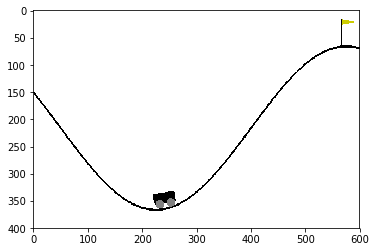

In [8]:
import gym
env = gym.make("MountainCar-v0")

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [9]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.56384418  0.        ]


In [10]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.56254307  0.00130111]
reward: -1.0
is game over?: False


In [14]:

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t):
    if t>50 and t<100:
        return actions['left']
    else:
        return actions['right']


for t in range(TIME_LIMIT):
    
    # change the line below to reach the flag
    s, r, done, _ = env.step(policy(t))
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    # print("Observation space:", env.observation_space)
    # print("Action space:", env.action_space)
    
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")

<IPython.core.display.Javascript object>

Well done!
